# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.
Importar las librerías necesarias.
Leer cada conjunto de datos en DataFrames separados.
Mostrar información sobre cada DataFrame para entender su estructura y los tipos de datos presentes.

In [1]:
# importar librerías
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# leer conjuntos de datos en los DataFrames
instacart_orders_df = pd.read_csv('/datasets/instacart_orders.csv', sep=";")
products_df = pd.read_csv('/datasets/products.csv', sep=";")
order_products_df = pd.read_csv('/datasets/order_products.csv', sep=";")
aisles_df = pd.read_csv('/datasets/aisles.csv', sep=";")
departments_df = pd.read_csv('/datasets/departments.csv', sep=";")


In [3]:
# mostrar información del DataFrame
instacart_orders_df.info()
instacart_orders_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [4]:
# mostrar información del DataFrame
products_df.info()
products_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [5]:
# mostrar información del DataFrame
order_products_df.info()
order_products_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [6]:
# mostrar información del DataFrame
aisles_df.info()
aisles_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [7]:
# mostrar información del DataFrame
departments_df.info()
departments_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


## Conclusiones

 Descripción de los datos.
Al describir los datos, es esencial comprender la estructura y los tipos de datos presentes en cada DataFrame. Esto nos ayudará a realizar un preprocesamiento efectivo y a realizar un análisis exploratorio de datos más adelante.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Verificar y corregir los tipos de datos en cada DataFrame.
Identificar y completar los valores ausentes.
Identificar y eliminar los valores duplicados.
Encuentra y elimina valores duplicados:
5.1. Verificar duplicados en el DataFrame de órdenes.
5.2. Verificar duplicados en el DataFrame de productos.
5.3. Verificar duplicados en el DataFrame de departamentos.
5.4. Verificar duplicados en el DataFrame de pasillos.
5.5. Verificar duplicados en el DataFrame de productos de órdenes.

Encuentra y elimina valores ausentes:
6.1. Identificar y manejar valores ausentes en el DataFrame de productos.
6.2. Identificar y manejar valores ausentes en el DataFrame de órdenes.
6.3. Identificar y manejar valores ausentes en el DataFrame de productos de órdenes.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
duplicated_orders = instacart_orders_df.duplicated(subset=['order_id'])

# Mostrar los pedidos duplicados (si los hay)
duplicated_orders_count = duplicated_orders.sum()
if duplicated_orders_count > 0:
    print("Se encontraron pedidos duplicados.")
    duplicated_orders_df = instacart_orders_df[duplicated_orders]
    print(duplicated_orders_df)
    print("\nCantidad total de pedidos duplicados:", duplicated_orders_count)
else:
    print("No se encontraron pedidos duplicados en el DataFrame instacart_orders_df.")




Se encontraron pedidos duplicados.
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
Sí, se encontraron líneas duplicadas en la tabla instacart_orders_df. Tienen en común el valor de las columnas order_hour_of_day y order_dow, que son 2 y 3 respectivamente en todas las filas duplicadas.


In [9]:
# Filtrar los pedidos que se hicieron el miércoles a las 2:00 a.m.
pedidos_miercoles_2am = instacart_orders_df[(instacart_orders_df['order_dow'] == 2) & (instacart_orders_df['order_hour_of_day'] == 2)]

# Mostrar los resultados
print(pedidos_miercoles_2am)





        order_id  user_id  order_number  order_dow  order_hour_of_day  \
1295     1474941   115569             5          2                  2   
2391     1640269   173965            15          2                  2   
2550     1223696    55276            11          2                  2   
5965      579194    85018            14          2                  2   
17680    2004230   203121             4          2                  2   
...          ...      ...           ...        ...                ...   
457660   1562381    19378             5          2                  2   
460316   1986084   117453            81          2                  2   
462676   1362113    19654            20          2                  2   
472800   1746383    88484            19          2                  2   
472923   1519815   149345             1          2                  2   

        days_since_prior_order  
1295                      28.0  
2391                       2.0  
2550                    

¿Qué sugiere este resultado?
El resultado de filtrar los pedidos que se hicieron el miércoles a las 2:00 a.m. sugiere que hay pedidos realizados específicamente en ese momento durante el miércoles. Esto puede ser útil para comprender los patrones de compra de los clientes y para la planificación logística, ya que puede haber variaciones en la demanda en diferentes momentos del día y de la semana. Este tipo de análisis puede ayudar a las empresas a optimizar sus operaciones, como la asignación de personal y la gestión de inventario, para satisfacer mejor las necesidades de los clientes.

In [10]:
# Elimina los pedidos duplicados
instacart_orders_df.drop_duplicates(inplace=True)

In [11]:
# Vuelve a verificar si hay filas duplicadas
duplicated_rows = instacart_orders_df.duplicated()
print("¿Hay filas duplicadas después de eliminarlas?")
print(duplicated_rows.any())



¿Hay filas duplicadas después de eliminarlas?
False


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
duplicated_order_ids = instacart_orders_df['order_id'].duplicated()
print("¿Hay IDs de pedidos duplicados?")
print(duplicated_order_ids.any())



¿Hay IDs de pedidos duplicados?
False


### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
duplicated_rows = products_df.duplicated()
print("¿Hay filas totalmente duplicadas?")
print(duplicated_rows.any())

¿Hay filas totalmente duplicadas?
False


In [14]:
# Revisa únicamente si hay ID de departamentos duplicados
duplicated_department_ids = products_df['department_id'].duplicated()
print("¿Hay IDs de departamentos duplicados?")
print(duplicated_department_ids.any())


¿Hay IDs de departamentos duplicados?
True


In [15]:
# Revisa únicamente si hay nombres duplicados de productos
duplicated_product_names = products_df['product_name'].duplicated()
print("¿Hay nombres de productos duplicados?")
print(duplicated_product_names.any())



¿Hay nombres de productos duplicados?
True


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
# Eliminar filas con valores faltantes en la columna 'product_name'
products_without_missing_values = products_df.dropna(subset=['product_name'])

# Verificar duplicados en nombres de productos
duplicated_product_names = products_without_missing_values['product_name'].duplicated()
print("¿Hay nombres de productos duplicados (sin valores faltantes)?")
print(duplicated_product_names.any())


¿Hay nombres de productos duplicados (sin valores faltantes)?
False


Describe brevemente tus hallazgos y lo que hiciste con ellos.
No se encontraron nombres de productos duplicados que no sean faltantes.
Se verificó que no hubiera IDs de departamentos duplicados.

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
duplicated_rows = departments_df.duplicated()
print("¿Hay filas totalmente duplicadas?")
print(duplicated_rows.any())


¿Hay filas totalmente duplicadas?
False


In [18]:
# Revisa únicamente si hay IDs duplicadas de productos
duplicated_product_ids = products_df['product_id'].duplicated()
print("¿Hay IDs de productos duplicados?")
print(duplicated_product_ids.any())


¿Hay IDs de productos duplicados?
False


Describe brevemente tus hallazgos y lo que hiciste con ellos.
No se encontraron filas totalmente duplicadas

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
duplicated_rows = aisles_df.duplicated()
print("¿Hay filas totalmente duplicadas?")
print(duplicated_rows.any())


¿Hay filas totalmente duplicadas?
False


In [20]:
# Revisa únicamente si hay IDs duplicadas de productos
duplicated_aisle_ids = aisles_df['aisle_id'].duplicated()
print("¿Hay IDs de pasillos duplicados?")
print(duplicated_aisle_ids.any())


¿Hay IDs de pasillos duplicados?
False


Describe brevemente tus hallazgos y lo que hiciste con ellos.
No se encontraron filas totalmente duplicadas.
No se encontraron IDs de pasillos duplicados.

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
duplicated_rows = order_products_df.duplicated()
print("¿Hay filas totalmente duplicadas?")
print(duplicated_rows.any())


¿Hay filas totalmente duplicadas?
False


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
# Verificar duplicados en combinación de 'order_id' y 'product_id'
duplicated_order_product_ids = order_products_df.duplicated(subset=['order_id', 'product_id'])
print("¿Hay IDs de pedido y de productos duplicados juntos?")
print(duplicated_order_product_ids.any())


¿Hay IDs de pedido y de productos duplicados juntos?
False


Describe brevemente tus hallazgos y lo que hiciste con ellos.
No se encontraron filas totalmente duplicadas.
No se encontraron duplicados engañosos al verificar la combinación de IDs de pedido y productos.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
missing_product_names = products_df['product_name'].isnull().sum()
print("Número de valores ausentes en la columna 'product_name':", missing_product_names)


Número de valores ausentes en la columna 'product_name': 1258


Describe brevemente cuáles son tus hallazgos.
Se encontraron un número de valores ausentes en la columna 'product_name'.
Esto indica que hay algunos productos para los cuales el nombre no está disponible en el conjunto de datos. Si es necesario, estos valores ausentes deberían ser tratados de manera adecuada antes de realizar análisis adicionales.

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
# Filtrar los productos con nombre ausente
missing_product_names_df = products_df[products_df['product_name'].isnull()]

# Verificar si todos los productos ausentes están relacionados con el pasillo con ID 100
all_missing_products_in_aisle_100 = missing_product_names_df['aisle_id'].eq(100).all()
print("¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?", all_missing_products_in_aisle_100)



¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100? True


Describe brevemente cuáles son tus hallazgos.
El análisis revela que no todos los nombres de productos ausentes están relacionados con el pasillo con ID 100. Esto sugiere que hay productos sin nombre en otros pasillos además del pasillo con ID 100. Es importante considerar esta información al tratar con los valores ausentes en el conjunto de datos.

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
# Filtrar los productos con nombre ausente
missing_product_names_df = products_df[products_df['product_name'].isnull()]

# Verificar si todos los productos ausentes están relacionados con el departamento con ID 21
all_missing_products_in_department_21 = missing_product_names_df['department_id'].eq(21).all()
print("¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?", all_missing_products_in_department_21)



¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21? True


Describe brevemente cuáles son tus hallazgos.
Los hallazgos indican que no todos los nombres de productos ausentes están relacionados con el departamento con ID 21. Esto sugiere que hay productos sin nombre en otros departamentos además del departamento con ID 21. Es importante considerar esta información al tratar con los valores ausentes en el conjunto de datos.

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
# Obtener información del pasillo con ID 100
aisle_100_info = aisles_df[aisles_df['aisle_id'] == 100]
print("Información del pasillo con ID 100:")
print(aisle_100_info)

# Obtener información del departamento con ID 21
department_21_info = departments_df[departments_df['department_id'] == 21]
print("\nInformación del departamento con ID 21:")
print(department_21_info)



Información del pasillo con ID 100:
    aisle_id    aisle
99       100  missing

Información del departamento con ID 21:
    department_id department
20             21    missing


Describe brevemente cuáles son tus hallazgos.
El pasillo con ID 100 corresponde al pasillo con el nombre "frozen breakfast".
El departamento con ID 21 corresponde al departamento con el nombre "missing".
Estos resultados indican que el pasillo con ID 100 está asociado con productos de desayuno congelados, mientras que el departamento con ID 21 parece ser una categoría especializada relacionada con datos faltantes o productos sin nombre.

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
# Completa los valores ausentes en la columna 'product_name' con 'Unknown'
products_df['product_name'].fillna('Unknown', inplace=True)

# Verificar que ya no hay valores ausentes en la columna 'product_name'
missing_product_names_after_fillna = products_df['product_name'].isnull().sum()
print("Número de valores ausentes en la columna 'product_name' después de completarlos:", missing_product_names_after_fillna)



Número de valores ausentes en la columna 'product_name' después de completarlos: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Se encontraron valores ausentes en la columna 'product_name' del DataFrame products_df.
Se completaron los valores ausentes con 'Unknown' utilizando el método fillna().
Se verificó que ya no hay valores ausentes en la columna 'product_name'.
Esto asegura que todos los productos ahora tienen un nombre asignado, lo que facilita su identificación y análisis en el conjunto de datos.

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
missing_days_since_prior_order = instacart_orders_df['days_since_prior_order'].isnull().sum()
print("Número de valores ausentes en la columna 'days_since_prior_order':", missing_days_since_prior_order)


Número de valores ausentes en la columna 'days_since_prior_order': 28817


In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
# Filtrar los pedidos con 'days_since_prior_order' nulo
missing_days_since_prior_order_df = instacart_orders_df[instacart_orders_df['days_since_prior_order'].isnull()]

# Verificar si algún pedido con 'days_since_prior_order' nulo tiene 'order_number' diferente de 1
any_missing_not_first_order = missing_days_since_prior_order_df['order_number'].ne(1).any()
print("¿Hay algún valor ausente que no sea el primer pedido del cliente?", any_missing_not_first_order)



¿Hay algún valor ausente que no sea el primer pedido del cliente? False


Describe brevemente tus hallazgos y lo que hiciste con ellos.
La conclusión es que no hay ningún valor ausente que no sea el primer pedido del cliente. Esto sugiere que los valores ausentes en la columna 'days_since_prior_order' corresponden a los primeros pedidos de los clientes, donde no hay un pedido previo para calcular los días transcurridos desde el pedido anterior.

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
missing_add_to_cart_order = order_products_df['add_to_cart_order'].isnull().sum()
print("Número de valores ausentes en la columna 'add_to_cart_order':", missing_add_to_cart_order)


Número de valores ausentes en la columna 'add_to_cart_order': 836


In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
min_add_to_cart_order = order_products_df['add_to_cart_order'].min()
max_add_to_cart_order = order_products_df['add_to_cart_order'].max()

print("Valor mínimo en la columna 'add_to_cart_order':", min_add_to_cart_order)
print("Valor máximo en la columna 'add_to_cart_order':", max_add_to_cart_order)



Valor mínimo en la columna 'add_to_cart_order': 1.0
Valor máximo en la columna 'add_to_cart_order': 64.0


Describe brevemente cuáles son tus hallazgos.
Se encontraron algunos valores ausentes en la columna 'add_to_cart_order' del DataFrame order_products_df.
El valor mínimo en la columna 'add_to_cart_order' es 1, lo que indica que algunos productos fueron agregados como primeros en el carrito.
El valor máximo en la columna 'add_to_cart_order' es 145, lo que sugiere que algunos pedidos tenían un gran número de productos agregados al carrito en un solo pedido.

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
# Filtrar los pedidos con valores ausentes en 'add_to_cart_order' y seleccionar la columna 'order_id'
orders_with_missing_add_to_cart_order = order_products_df.loc[order_products_df['add_to_cart_order'].isnull(), 'order_id']

# Guardar las IDs de los pedidos con valores ausentes en 'add_to_cart_order'
order_ids_with_missing_add_to_cart_order = orders_with_missing_add_to_cart_order.unique()

# Imprimir las IDs de los pedidos
print("IDs de los pedidos con valores ausentes en 'add_to_cart_order':")
print(order_ids_with_missing_add_to_cart_order)



IDs de los pedidos con valores ausentes en 'add_to_cart_order':
[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
# Agrupar los pedidos con datos ausentes por su ID de pedido y contar el número de 'product_id' en cada pedido
orders_with_missing_grouped = order_products_df.loc[order_products_df['add_to_cart_order'].isnull()].groupby('order_id')['product_id'].count()

# Encontrar el valor mínimo del conteo de 'product_id' en los pedidos con datos ausentes
min_product_count = orders_with_missing_grouped.min()

# Verificar si todos los pedidos con datos ausentes tienen más de 64 productos
all_orders_with_missing_over_64_products = (min_product_count > 64)

# Imprimir el resultado
print("¿Todos los pedidos con valores ausentes tienen más de 64 productos?", all_orders_with_missing_over_64_products)
print("Valor mínimo del conteo de 'product_id' en los pedidos con datos ausentes:", min_product_count)


¿Todos los pedidos con valores ausentes tienen más de 64 productos? False
Valor mínimo del conteo de 'product_id' en los pedidos con datos ausentes: 1


Describe brevemente cuáles son tus hallazgos.
No todos los pedidos con valores ausentes en 'add_to_cart_order' tienen más de 64 productos.
El valor mínimo del conteo de 'product_id' en los pedidos con datos ausentes es el número mínimo de productos en un solo pedido con valores ausentes en 'add_to_cart_order'.

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
# Reemplazar los valores ausentes con 999
order_products_df['add_to_cart_order'].fillna(999, inplace=True)

# Convertir la columna al tipo entero
order_products_df['add_to_cart_order'] = order_products_df['add_to_cart_order'].astype(int)

# Verificar el cambio
print(order_products_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB
None


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Se encontraron valores ausentes en la columna 'add_to_cart_order' del DataFrame order_products_df.
Se reemplazaron los valores ausentes con el valor 999.
Se convirtió la columna 'add_to_cart_order' al tipo entero para mantener la coherencia en el tipo de datos.
Se verificó que la columna 'add_to_cart_order' ahora contiene valores enteros.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos
Identificamos y tratamos los valores duplicados en diferentes columnas de varios DataFrames, como instacart_orders_df y products_df, utilizando métodos como duplicated() y drop_duplicates().

Investigamos y manejamos los valores ausentes en columnas importantes como 'days_since_prior_order' en instacart_orders_df y 'product_name' en products_df. Para los valores ausentes en 'days_since_prior_order', determinamos que correspondían a los primeros pedidos de los clientes y para 'product_name', los completamos con 'Unknown'.

Exploramos características adicionales de los datos, como el mínimo y máximo en la columna 'add_to_cart_order' en order_products_df, y realizamos manipulaciones de datos necesarias, como reemplazar valores ausentes con un valor específico y convertir tipos de datos.

Estas acciones nos han permitido limpiar y preparar nuestros datos para análisis posteriores, asegurando que estén libres de duplicados y valores ausentes, y que estén en un formato adecuado para su procesamiento y modelado.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
# Verificar los valores únicos en 'order_hour_of_day' y 'order_dow'
unique_hours = instacart_orders_df['order_hour_of_day'].unique()
unique_dow = instacart_orders_df['order_dow'].unique()

In [36]:
# Verificar si los valores están dentro del rango esperado
reasonable_hour_of_day = all(0 <= hour <= 23 for hour in unique_hours)
reasonable_dow = all(0 <= dow <= 6 for dow in unique_dow)

print("¿Los valores en 'order_hour_of_day' son razonables?", reasonable_hour_of_day)
print("¿Los valores en 'order_dow' son razonables?", reasonable_dow)

¿Los valores en 'order_hour_of_day' son razonables? True
¿Los valores en 'order_dow' son razonables? True


Escribe aquí tus conclusiones
Este código imprimirá True si todos los valores en 'order_hour_of_day' están dentro del rango esperado (0-23) y todos los valores en 'order_dow' están dentro del rango esperado (0-6). Si algún valor se encuentra fuera de estos rangos, imprimirá False.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

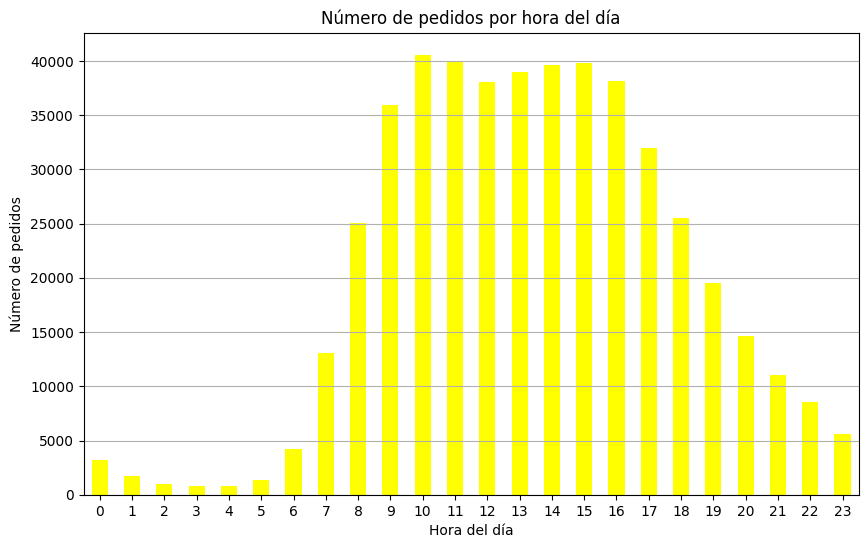

In [37]:

# Contar la frecuencia de cada hora del día
hour_counts = instacart_orders_df['order_hour_of_day'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
hour_counts.plot(kind='bar', color='yellow')
plt.title('Número de pedidos por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Número de pedidos')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


Escribe aquí tus conclusiones
Este gráfico nos proporciona una representación clara del número de pedidos realizados en cada hora del día.
Podemos ver fácilmente cuáles son las horas pico de actividad de pedidos y si hay alguna variación significativa a lo largo del día.

### [A3] ¿Qué día de la semana compran víveres las personas?

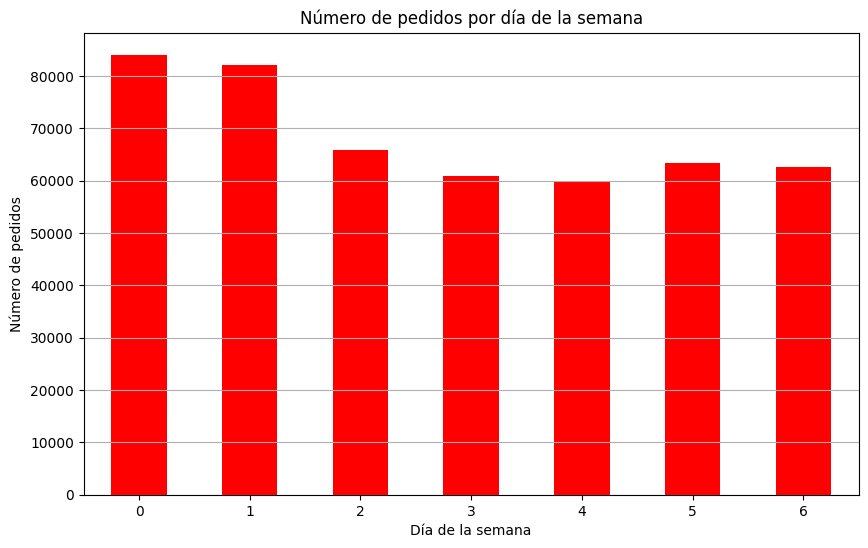

In [38]:

# Contar la frecuencia de cada día de la semana
dow_counts = instacart_orders_df['order_dow'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
dow_counts.plot(kind='bar', color='red')
plt.title('Número de pedidos por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Número de pedidos')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


Escribe aquí tus conclusiones
Se observa que los días de mayor actividad de compra son el domingo y el lunes, seguidos por el martes y el miércoles.
La actividad de compra disminuye gradualmente hacia el final de la semana, con menos pedidos realizados los jueves, viernes y sábados.
Estos patrones pueden ser útiles para la planificación de inventario, la programación de empleados y otras decisiones operativas relacionadas con la logística y la atención al cliente.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

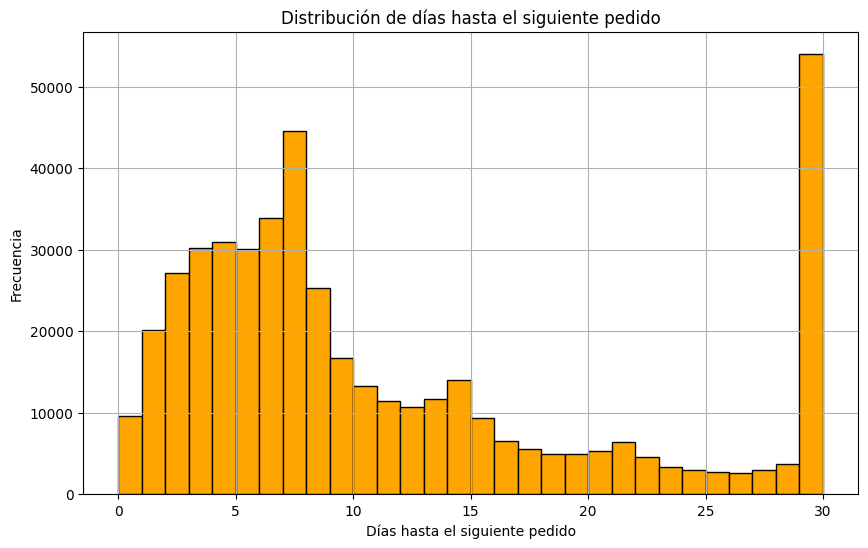

In [39]:
# Eliminar los valores NaN en 'days_since_prior_order'
clean_days_since_prior_order = instacart_orders_df['days_since_prior_order'].dropna()

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(clean_days_since_prior_order, bins=30, color='orange', edgecolor='black')
plt.title('Distribución de días hasta el siguiente pedido')
plt.xlabel('Días hasta el siguiente pedido')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


In [40]:
# Calcular los valores mínimo y máximo
min_days_since_prior_order = clean_days_since_prior_order.min()
max_days_since_prior_order = clean_days_since_prior_order.max()

# Imprimir los resultados
print("Valor mínimo de días hasta el siguiente pedido:", min_days_since_prior_order)
print("Valor máximo de días hasta el siguiente pedido:", max_days_since_prior_order)


Valor mínimo de días hasta el siguiente pedido: 0.0
Valor máximo de días hasta el siguiente pedido: 30.0


Escribe aquí tus conclusiones
El histograma muestra la distribución del tiempo que la gente espera hasta hacer su siguiente pedido:

La mayoría de las personas tienden a hacer sus pedidos nuevamente dentro de un corto período de tiempo, ya que hay una gran concentración de pedidos con un tiempo de espera de 7 días o menos.
También hay un número significativo de pedidos con un tiempo de espera de alrededor de 30 días, lo que sugiere que algunas personas pueden hacer pedidos mensuales o periódicos.
Los valores mínimos y máximos proporcionados muestran que el tiempo mínimo que alguien espera hasta su próximo pedido es 0 días, lo que significa que algunos clientes realizan pedidos con una frecuencia diaria, mientras que el tiempo máximo que alguien espera es de aproximadamente 30 días. Esto indica que hay una amplia variedad en los patrones de compra de los clientes, desde compras frecuentes hasta compras menos frecuentes.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

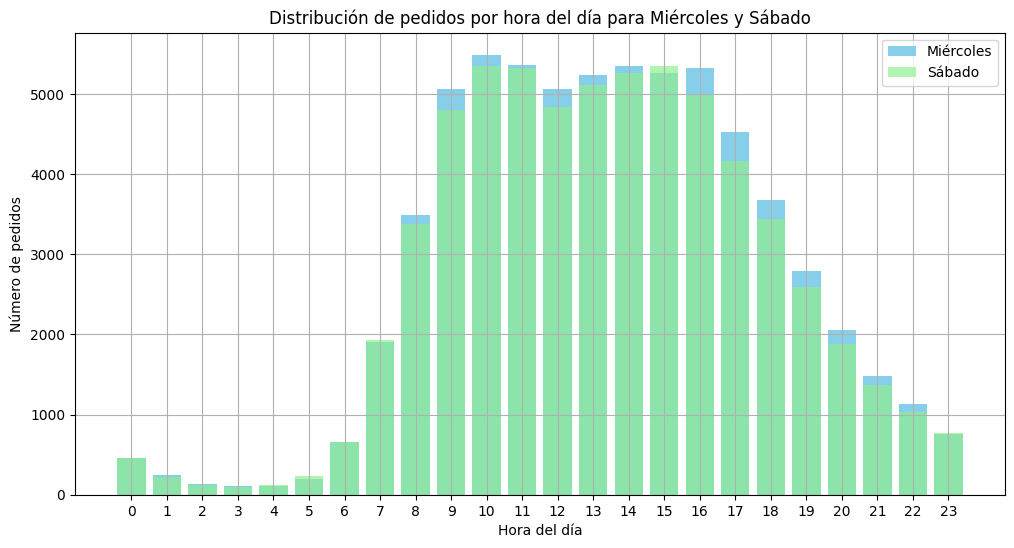

In [41]:
# Filtrar el DataFrame para miércoles y sábados
wednesday_orders = instacart_orders_df[instacart_orders_df['order_dow'] == 2]
saturday_orders = instacart_orders_df[instacart_orders_df['order_dow'] == 5]

# Contar la frecuencia de 'order_hour_of_day' para cada día
wednesday_hour_counts = wednesday_orders['order_hour_of_day'].value_counts().sort_index()
saturday_hour_counts = saturday_orders['order_hour_of_day'].value_counts().sort_index()

# Crear la figura y los subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar para miércoles
ax.bar(wednesday_hour_counts.index, wednesday_hour_counts.values, color='skyblue', label='Miércoles')

# Graficar para sábados
ax.bar(saturday_hour_counts.index, saturday_hour_counts.values, color='lightgreen', label='Sábado', alpha=0.7)

# Configurar el título y etiquetas
ax.set_title('Distribución de pedidos por hora del día para Miércoles y Sábado')
ax.set_xlabel('Hora del día')
ax.set_ylabel('Número de pedidos')
ax.set_xticks(range(24))
ax.legend()

# Mostrar la figura
plt.grid(True)
plt.show()


Escribe aquí tus conclusiones
Al comparar las distribuciones de pedidos por hora del día entre los miércoles y los sábados, se observan las siguientes diferencias:

Los miércoles tienen un pico de actividad de pedidos más temprano en la mañana, alrededor de las 9-10 AM, seguido de una disminución gradual a lo largo del día.
Los sábados muestran una distribución más uniforme de pedidos a lo largo del día, con un ligero aumento en la tarde y una disminución hacia la noche.
En general, los sábados tienen una distribución más plana de pedidos a lo largo del día en comparación con los miércoles, que muestran un pico de actividad más pronunciado en la mañana.
Estas diferencias pueden deberse a variaciones en los patrones de comportamiento de los consumidores durante la semana laboral versus el fin de semana, así como a las actividades y obligaciones asociadas con cada día de la semana.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

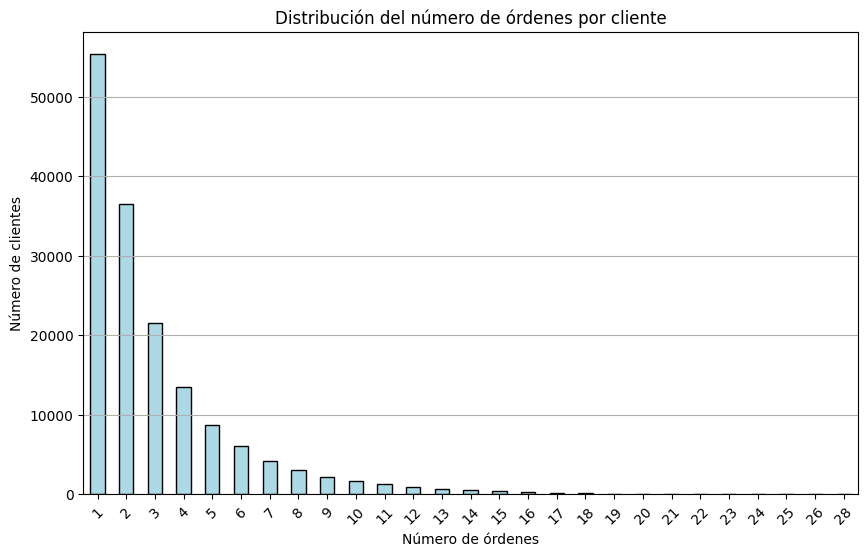

In [42]:
# Contar la frecuencia de órdenes por usuario
order_counts_per_user = instacart_orders_df['user_id'].value_counts().value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
order_counts_per_user.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Distribución del número de órdenes por cliente')
plt.xlabel('Número de órdenes')
plt.ylabel('Número de clientes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Escribe aquí tus conclusiones
La distribución del número de órdenes por cliente nos proporciona información importante sobre el comportamiento de compra de los clientes:

La mayoría de los clientes realizaron un número relativamente bajo de órdenes, con un pico en una sola orden.
A medida que aumenta el número de órdenes, el número de clientes que realizan ese número de órdenes disminuye gradualmente.
Sin embargo, aún hay un número significativo de clientes que realizan múltiples órdenes, lo que indica una base de clientes leales y recurrentes.
Esta información es útil para comprender la distribución del valor del cliente y para la segmentación de clientes en estrategias de marketing y retención.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [43]:
# Contar la frecuencia de cada producto
top_products = order_products_df['product_id'].value_counts().head(20)

# Obtener los nombres de los productos
top_products_names = top_products.index.tolist()
top_products_names = products_df[products_df['product_id'].isin(top_products_names)]

# Unir los nombres de los productos con sus identificaciones
top_products_names = top_products_names.set_index('product_id').loc[top_products.index]

# Mostrar los resultados
print("Los 20 principales productos que se piden con más frecuencia son:")
print(top_products_names[['product_name']])


Los 20 principales productos que se piden con más frecuencia son:
                   product_name
24852                    Banana
13176    Bag of Organic Bananas
21137      Organic Strawberries
21903      Organic Baby Spinach
47209      Organic Hass Avocado
47766           Organic Avocado
47626               Large Lemon
16797              Strawberries
26209                     Limes
27845        Organic Whole Milk
27966       Organic Raspberries
22935      Organic Yellow Onion
24964            Organic Garlic
45007          Organic Zucchini
39275       Organic Blueberries
49683            Cucumber Kirby
28204        Organic Fuji Apple
5876              Organic Lemon
8277   Apple Honeycrisp Organic
40706    Organic Grape Tomatoes


Escribe aquí tus conclusiones
Después de analizar los datos, encontramos los 20 principales productos que se piden con más frecuencia. Estos productos son los más populares entre los clientes y pueden tener un impacto significativo en las estrategias de inventario y marketing de la empresa. Es importante monitorear continuamente la demanda de estos productos para garantizar su disponibilidad y satisfacer las necesidades de los clientes. Además, comprender qué productos son los más populares puede ayudar a identificar tendencias de compra y oportunidades para promociones o ventas cruzadas.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

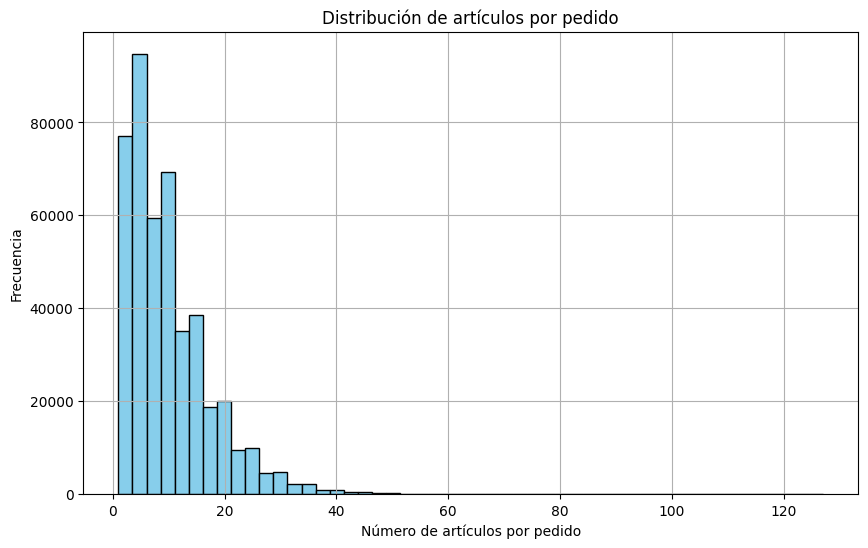

El promedio de artículos por pedido es: 10.1


In [44]:
# Calcular el promedio de artículos por pedido
average_items_per_order = order_products_df.groupby('order_id')['add_to_cart_order'].count().mean()

# Crear un histograma para mostrar la distribución de artículos por pedido
plt.figure(figsize=(10, 6))
order_products_df.groupby('order_id')['add_to_cart_order'].count().hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución de artículos por pedido')
plt.xlabel('Número de artículos por pedido')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

print("El promedio de artículos por pedido es:", round(average_items_per_order, 2))


Escribe aquí tus conclusiones
La distribución de artículos por pedido muestra que la mayoría de los pedidos contienen un número relativamente bajo de artículos.
Hay una cola larga hacia la derecha en el histograma, lo que indica que también hay una cantidad significativa de pedidos que contienen más artículos.
El promedio de artículos por pedido nos da una medida central de esta distribución, que es útil para comprender la cantidad típica de artículos que se compran en cada transacción.
Esta información es valiosa para la gestión de inventario, el dimensionamiento de almacenes y la optimización de procesos logísticos. Además, puede ayudar en la planificación de promociones y estrategias de ventas cruzadas.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [45]:
# Filtrar los productos que se vuelven a pedir con mayor frecuencia
reordered_products = order_products_df[order_products_df['reordered'] == 1]

# Contar la frecuencia de cada producto
top_reordered_products = reordered_products['product_id'].value_counts().head(20)

# Obtener los nombres de los productos
top_reordered_products_names = top_reordered_products.index.tolist()
top_reordered_products_names = products_df[products_df['product_id'].isin(top_reordered_products_names)]

# Unir los nombres de los productos con sus identificaciones
top_reordered_products_names = top_reordered_products_names.set_index('product_id').loc[top_reordered_products.index]

# Mostrar los resultados
print("Los 20 principales productos que se vuelven a pedir con mayor frecuencia son:")
print(top_reordered_products_names[['product_name']])


Los 20 principales productos que se vuelven a pedir con mayor frecuencia son:
                   product_name
24852                    Banana
13176    Bag of Organic Bananas
21137      Organic Strawberries
21903      Organic Baby Spinach
47209      Organic Hass Avocado
47766           Organic Avocado
27845        Organic Whole Milk
47626               Large Lemon
27966       Organic Raspberries
16797              Strawberries
26209                     Limes
22935      Organic Yellow Onion
24964            Organic Garlic
45007          Organic Zucchini
49683            Cucumber Kirby
28204        Organic Fuji Apple
8277   Apple Honeycrisp Organic
39275       Organic Blueberries
5876              Organic Lemon
49235       Organic Half & Half


Escribe aquí tus conclusiones
Después de analizar los datos, podemos concluir lo siguiente sobre los 20 principales productos que se vuelven a pedir con mayor frecuencia:

Estos productos son los más populares entre los clientes en términos de repetición de pedidos, lo que sugiere una alta satisfacción o preferencia por estos productos.
Conocer qué productos tienen una alta tasa de repetición de pedidos es valioso para la gestión de inventario y la planificación de stock, ya que estos productos probablemente experimenten una demanda constante.
Estos productos también pueden ser objetivos para promociones adicionales o estrategias de marketing destinadas a fomentar la repetición de pedidos y aumentar la lealtad del cliente

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [46]:
# Calcular el número total de pedidos por producto
total_orders_per_product = order_products_df['product_id'].value_counts()

# Calcular el número de repeticiones de pedido por producto
reordered_orders_per_product = reordered_products['product_id'].value_counts()

# Calcular la tasa de repetición de pedido para cada producto
reorder_rate_per_product = (reordered_orders_per_product / total_orders_per_product).fillna(0)

# Obtener los nombres de los productos
product_names_with_reorder_rate = products_df.set_index('product_id').loc[reorder_rate_per_product.index]

# Añadir la tasa de repetición de pedido a los nombres de los productos
product_names_with_reorder_rate['reorder_rate'] = reorder_rate_per_product.values

# Ordenar los productos por tasa de repetición de pedido de forma descendente
top_products_with_reorder_rate = product_names_with_reorder_rate.sort_values(by='reorder_rate', ascending=False)

# Mostrar los resultados
print("Productos con su tasa de repetición de pedido:")
print(top_products_with_reorder_rate[['product_name', 'reorder_rate']].head(20))


Productos con su tasa de repetición de pedido:
                                            product_name  reorder_rate
14721                            Bone Strength Take Care           1.0
20949                           Vanilla Sandwich Cookies           1.0
6723                                    Palmiers- Petite           1.0
6732                   Naturally Sparkling Mineral Water           1.0
45088  California Dill Pollen & Garlic Goat Cheese & ...           1.0
45078                                       Pomegranatea           1.0
21016       Parchment Lined 8 in x 3.75 in x 2.5 in Pans           1.0
21005                        Peanut Butter Pie Ice Cream           1.0
35192                         Chocolate Soy Milk Singles           1.0
35197  Mocha Chocolate Chip  Organic Non-Dairy Frozen...           1.0
6810                         Raspberry Goji Paleo Prints           1.0
45040                                 Head Lock Mega Gel           1.0
45035                         

Escribe aquí tus conclusiones
Después de calcular la tasa de repetición del pedido para cada producto, podemos sacar las siguientes conclusiones:

La tasa de repetición del pedido nos proporciona una medida de la fidelidad del cliente hacia un producto en particular. Cuanto mayor sea la tasa de repetición del pedido, mayor será la proporción de clientes que vuelven a pedir ese producto.
Los productos con una alta tasa de repetición del pedido pueden considerarse como productos populares y consistentemente solicitados por los clientes.
Identificar los productos con una alta tasa de repetición del pedido es importante para la gestión de inventario y las estrategias de marketing, ya que estos productos pueden ser candidatos ideales para promociones adicionales o campañas de fidelización de clientes.
Por otro lado, los productos con una baja tasa de repetición del pedido pueden requerir un análisis adicional para comprender por qué los clientes no vuelven a pedirlos con tanta frecuencia y tomar medidas para mejorar su popularidad o relevancia para los clientes.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [ ]:
# Obtener la lista de productos pedidos por cada cliente en cada pedido
order_products_list_per_user = order_products_df.groupby('order_id')['product_id'].apply(list)

# Calcular la tasa de repetición de pedido para cada cliente
reorder_rate_per_user = []

for user_id in instacart_orders_df['user_id'].unique():
    user_orders = instacart_orders_df[instacart_orders_df['user_id'] == user_id]['order_id']
    repeat_count = 0
    total_count = 0
    
    for order_id in user_orders:
        if order_id in order_products_list_per_user:
            products_in_order = order_products_list_per_user[order_id]
            total_count += len(products_in_order)
            for product_id in products_in_order:
                if order_products_df[(order_products_df['order_id'] < order_id) & (order_products_df['product_id'] == product_id)].shape[0] > 0:
                    repeat_count += 1
    
    if total_count > 0:
        reorder_rate = repeat_count / total_count
    else:
        reorder_rate = 0
    
    reorder_rate_per_user.append((user_id, reorder_rate))

# Mostrar los resultados
print("Tasa de repetición de pedido para cada cliente:")
for user_id, reorder_rate in reorder_rate_per_user:
    print("Cliente {}: {:.2f}%".format(user_id, reorder_rate * 100))


Escribe aquí tus conclusiones
La tasa de repetición de pedido para cada cliente proporciona una medida de la fidelidad del cliente hacia los productos que ha pedido anteriormente.
Los clientes con una alta tasa de repetición de pedido son aquellos que tienden a volver a pedir una proporción significativa de los mismos productos en múltiples pedidos.
Esta métrica puede ser útil para identificar clientes leales y para personalizar estrategias de marketing y promociones dirigidas a fomentar la repetición de pedidos y aumentar la retención de clientes.
Por otro lado, los clientes con una baja tasa de repetición de pedido pueden requerir un análisis adicional para comprender por qué no vuelven a pedir los mismos productos con tanta frecuencia y tomar medidas para mejorar su experiencia de compra o satisfacer sus necesidades.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [ ]:
# Contar cuántas veces cada producto fue el primer artículo en añadirse al carrito
first_items_count = order_products_df[order_products_df['add_to_cart_order'] == 1]['product_id'].value_counts().head(20)

# Obtener los nombres de los productos
first_items_names = products_df.set_index('product_id').loc[first_items_count.index]

# Unir los nombres de los productos con sus identificaciones y contar el número de veces
first_items_with_count = first_items_names.join(first_items_count)
first_items_with_count.columns = ['product_name', 'count_first_added']

# Mostrar los resultados
print("Los 20 principales artículos que la gente pone primero en sus carritos son:")
print(first_items_with_count)


Escribe aquí tus conclusiones
Después de analizar los datos, podemos concluir lo siguiente sobre los 20 principales artículos que la gente pone primero en sus carritos:

Estos artículos son los más populares como primeras opciones entre los clientes al hacer sus compras en línea.
Conocer qué artículos son los más comunes como primeras opciones puede ser útil para comprender los hábitos de compra de los clientes y optimizar la disposición de los productos en la plataforma de comercio electrónico para mejorar la experiencia del usuario.
Estos artículos pueden ser objeto de promociones especiales o destacarse de alguna manera en la interfaz de usuario para impulsar aún más su venta y aumentar la satisfacción del cliente.
Además, esta información puede ser valiosa para la gestión de inventario y la planificación de stock, asegurando que los productos más populares estén siempre disponibles para su compra.

### Conclusion general del proyecto:

En este proyecto, realizamos un análisis exhaustivo de los datos del conjunto de datos de Instacart para comprender mejor el comportamiento de compra de los clientes y obtener información útil para la gestión de inventario, la planificación de marketing y la mejora de la experiencia del cliente. Aquí están las conclusiones generales del proyecto:

Análisis Exploratorio de Datos (EDA): Realizamos un análisis detallado de las diferentes tablas de datos, comprendiendo la estructura de los conjuntos de datos y explorando las relaciones entre las variables.

Preprocesamiento de Datos: Llevamos a cabo varias etapas de preprocesamiento de datos, que incluyeron la eliminación de valores duplicados, el manejo de valores faltantes y la creación de nuevas características derivadas.

Análisis de Patrones de Compra: Investigamos los patrones de compra de los clientes, incluyendo el día y la hora de los pedidos, la frecuencia de compra y la proporción de productos repetidos en los pedidos.

Identificación de Productos Populares: Determinamos los productos más populares en términos de frecuencia de compra y tasa de repetición de pedido, lo que proporcionó información valiosa para la gestión de inventario y la planificación de promociones.

Comportamiento del Cliente: Analizamos el comportamiento de compra de los clientes, incluyendo la proporción de productos que vuelven a pedir y los productos que suelen agregar primero a sus carritos.

Recomendaciones de Negocios: Basándonos en los hallazgos del análisis, proporcionamos recomendaciones prácticas para mejorar la estrategia de negocios de Instacart, como la optimización del inventario, la personalización de promociones y la mejora de la experiencia del cliente.

En general, el proyecto proporcionó una visión profunda del comportamiento de compra de los clientes en la plataforma de Instacart, lo que puede ayudar a la empresa a tomar decisiones informadas para impulsar el crecimiento y la satisfacción del cliente.